In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [28]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [29]:
df.shape

(1000, 40)

In [30]:
df.replace('?',np.nan,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- CHECKING FOR NULL VALUES

In [35]:
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries     

In [36]:
df.dropna(subset=['collision_type','property_damage','police_report_available'],how='any',inplace=True)

In [37]:
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries     

# CHECKING RELATIONSHIP AND MULTICOLINEARITY

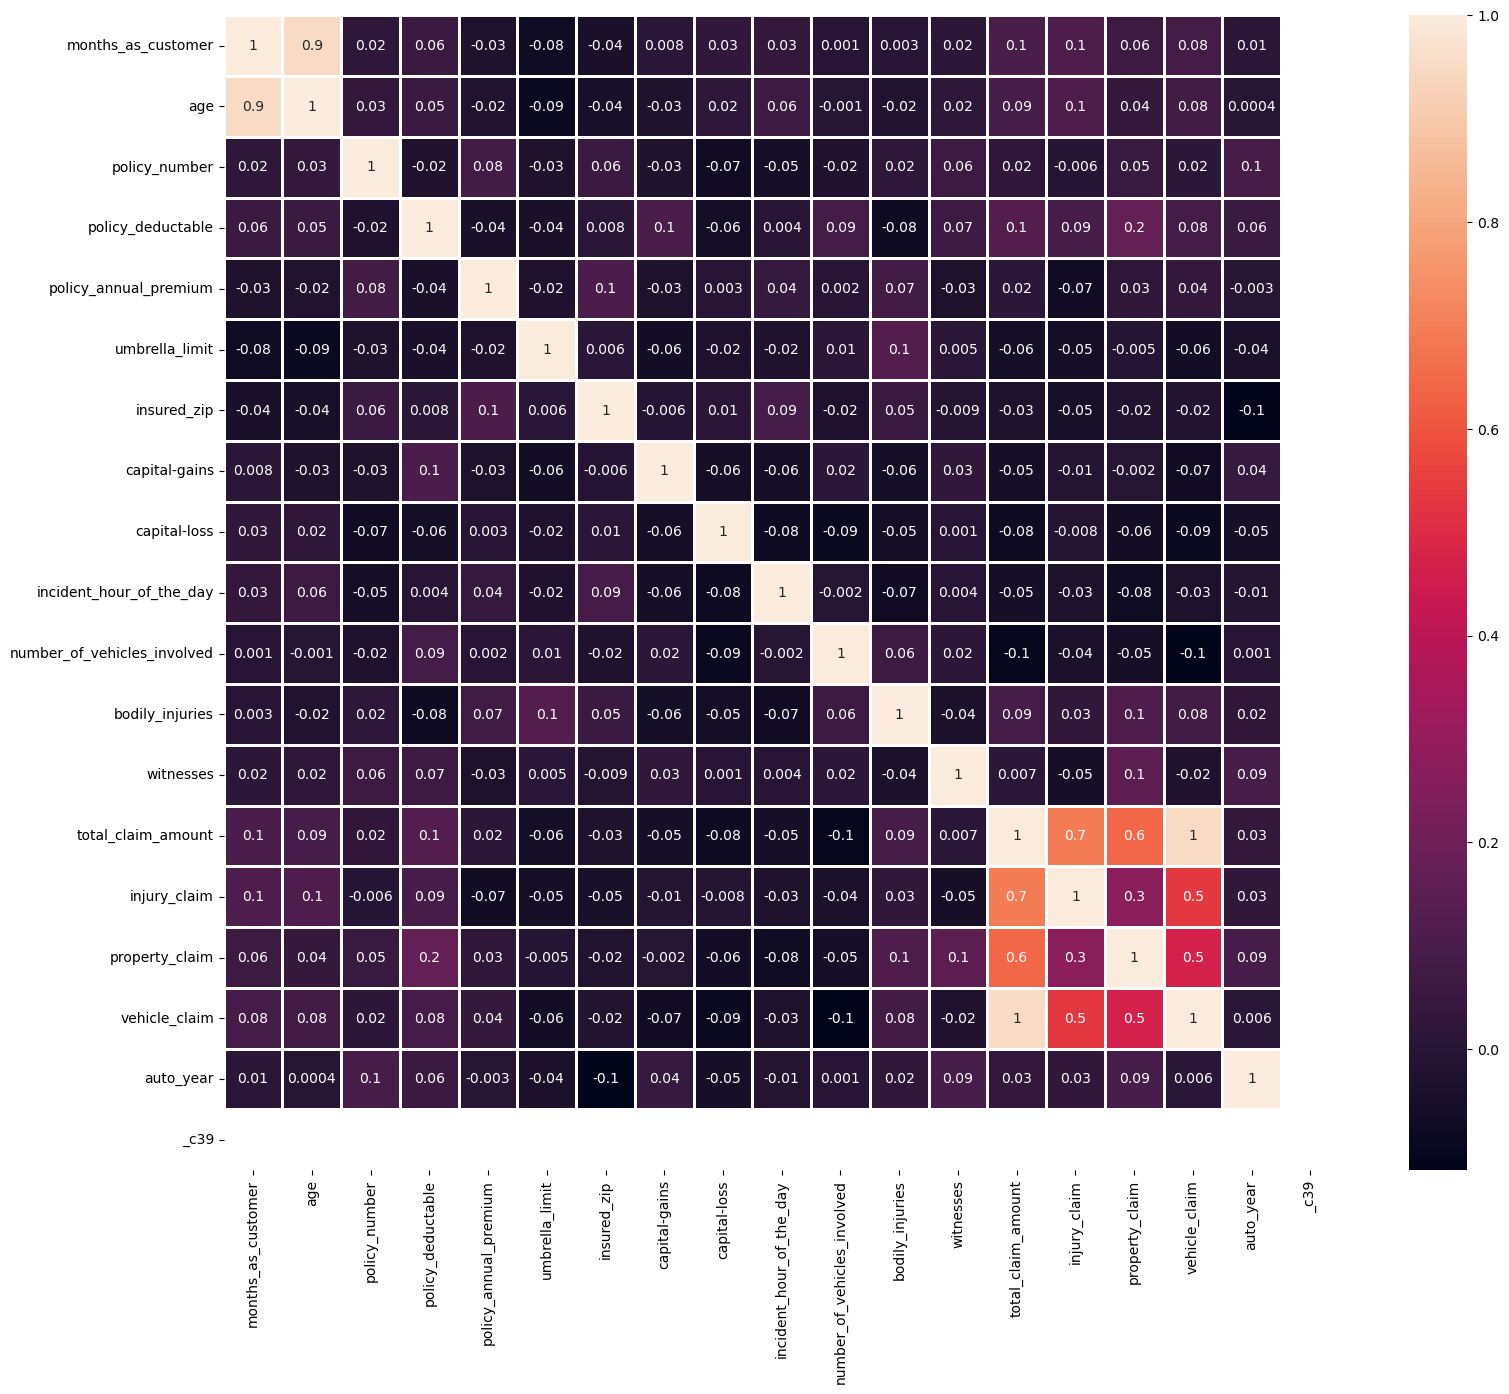

In [40]:
plt.figure(figsize=(18,15))
corr=df.corr()
sns.heatmap(data=corr,annot=True,fmt='.1g',linewidth=2)
plt.show()

- CHECKING FOR THE UNIQUE VALUES BECAUSE IF THE VALUE OF UNIQUE VALUE IS HIGH THEN THE VARIANCE WILL BE SO HIGH 

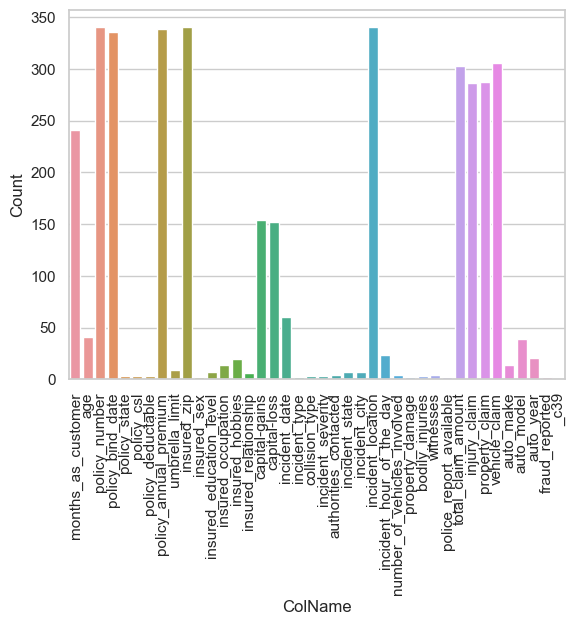

In [42]:
unique=df.nunique().to_frame()
unique.columns=['Count']
unique.index.names=['ColName']
unique=unique.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='ColName',y='Count',data=unique)
plt.xticks(rotation=90)
plt.show()

In [43]:
unique.sort_values(by='Count',ascending=False)

,ColName,Count
9,insured_zip,340
2,policy_number,340
24,incident_location,340
7,policy_annual_premium,338
3,policy_bind_date,336
34,vehicle_claim,306
31,total_claim_amount,303
33,property_claim,287
32,injury_claim,286
0,months_as_customer,241


- I GOT TO KNOW THAT 'policy_number','policy_blind_date','policy_state','insures_zip','incident_location','incident_date',
'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','_c39' ARE USELESS

- HENCE I WILL DROP THAT ARE NOT USED IN THE PROJECT

In [45]:
to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date', 'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','_c39']
df.drop(to_drop,inplace=True,axis=1)

In [46]:
df.head()

ColName,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
5,256,39,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,unmarried,...,3,NO,0,2,NO,64100,6410,6410,51280,Y
8,27,33,100/300,500,1442.99,0,FEMALE,PhD,other-service,own-child,...,1,NO,1,1,YES,27700,2770,2770,22160,N
11,447,61,100/300,2000,1137.16,0,FEMALE,High School,exec-managerial,other-relative,...,3,YES,1,2,YES,114920,17680,17680,79560,N


- CHECKING MULTICOLINEARITY

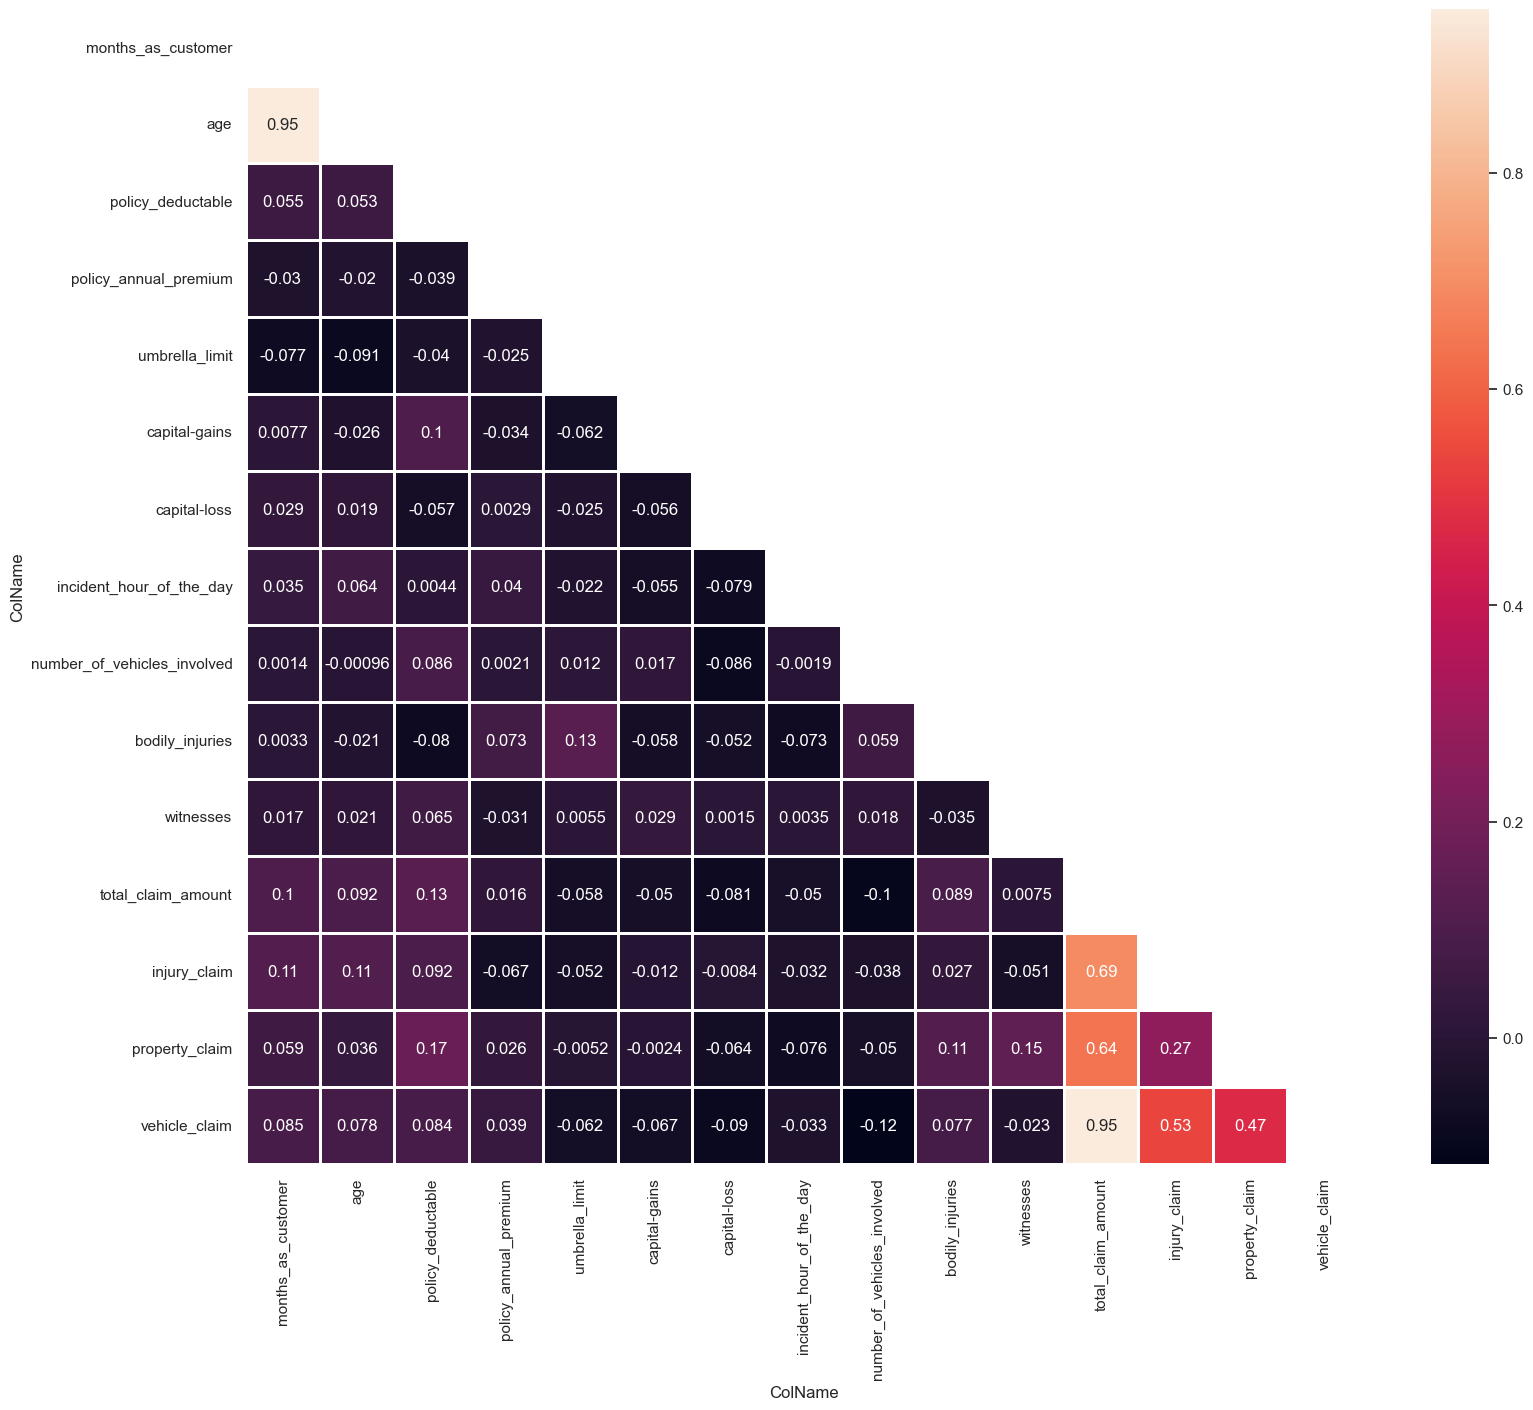

In [56]:
plt.figure(figsize=(18,15))
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))

sns.heatmap(data=corr,mask=mask,annot=True,fmt='.2g', linewidth=1)
plt.show()

- THE AGE COLUMNS AND MONTHS AS CUSTOMER COLUMN HAS A VERY HIGH CORRELATION,ALSO TOTAL CLAIM AMOUNT WITH THE VEHICLE CLAIM, PROPERTY CLAIM AND INJURY CLAIM HAS HIGH CORRELATION

In [58]:
df.drop(columns=['age','total_claim_amount'],inplace=True,axis=1)

In [60]:
df.head()

ColName,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
5,256,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,unmarried,0,...,19,3,NO,0,2,NO,6410,6410,51280,Y
8,27,100/300,500,1442.99,0,FEMALE,PhD,other-service,own-child,0,...,21,1,NO,1,1,YES,2770,2770,22160,N
11,447,100/300,2000,1137.16,0,FEMALE,High School,exec-managerial,other-relative,0,...,21,3,YES,1,2,YES,17680,17680,79560,N


- SEPERATING TRAGET AND INDEPENDENT FEATURES

In [63]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

- COVERTING LABEL COLUMNS INTO NUMERICAL BY USING ORDINAL ENCODING

In [64]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [65]:
df

ColName,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1.0,1000,1406.91,0,1.0,4.0,2.0,0.0,53300,...,5,1,1.0,1,2,1.0,6510,13020,52080,1.0
2,134,0.0,2000,1413.14,5000000,0.0,6.0,11.0,3.0,35100,...,7,3,0.0,2,3,0.0,7700,3850,23100,0.0
5,256,1.0,1000,1351.10,0,0.0,6.0,12.0,4.0,0,...,19,3,0.0,0,2,0.0,6410,6410,51280,1.0
8,27,0.0,500,1442.99,0,0.0,6.0,7.0,3.0,0,...,21,1,0.0,1,1,1.0,2770,2770,22160,0.0
11,447,0.0,2000,1137.16,0,0.0,2.0,3.0,2.0,0,...,21,3,1.0,1,2,1.0,17680,17680,79560,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,245,2.0,1000,1361.45,0,1.0,6.0,5.0,4.0,39300,...,12,1,1.0,0,2,1.0,7470,7470,67230,0.0
984,163,1.0,1000,1503.21,0,1.0,4.0,7.0,0.0,55700,...,1,1,1.0,2,1,0.0,5710,11420,34260,0.0
988,295,0.0,500,1672.88,0,0.0,2.0,1.0,5.0,0,...,5,1,1.0,1,1,0.0,12140,6070,42490,0.0
991,257,0.0,1000,1280.88,0,1.0,4.0,7.0,2.0,59400,...,21,1,0.0,0,1,0.0,0,5220,41760,0.0


# CHECKING THE OUTLIERS

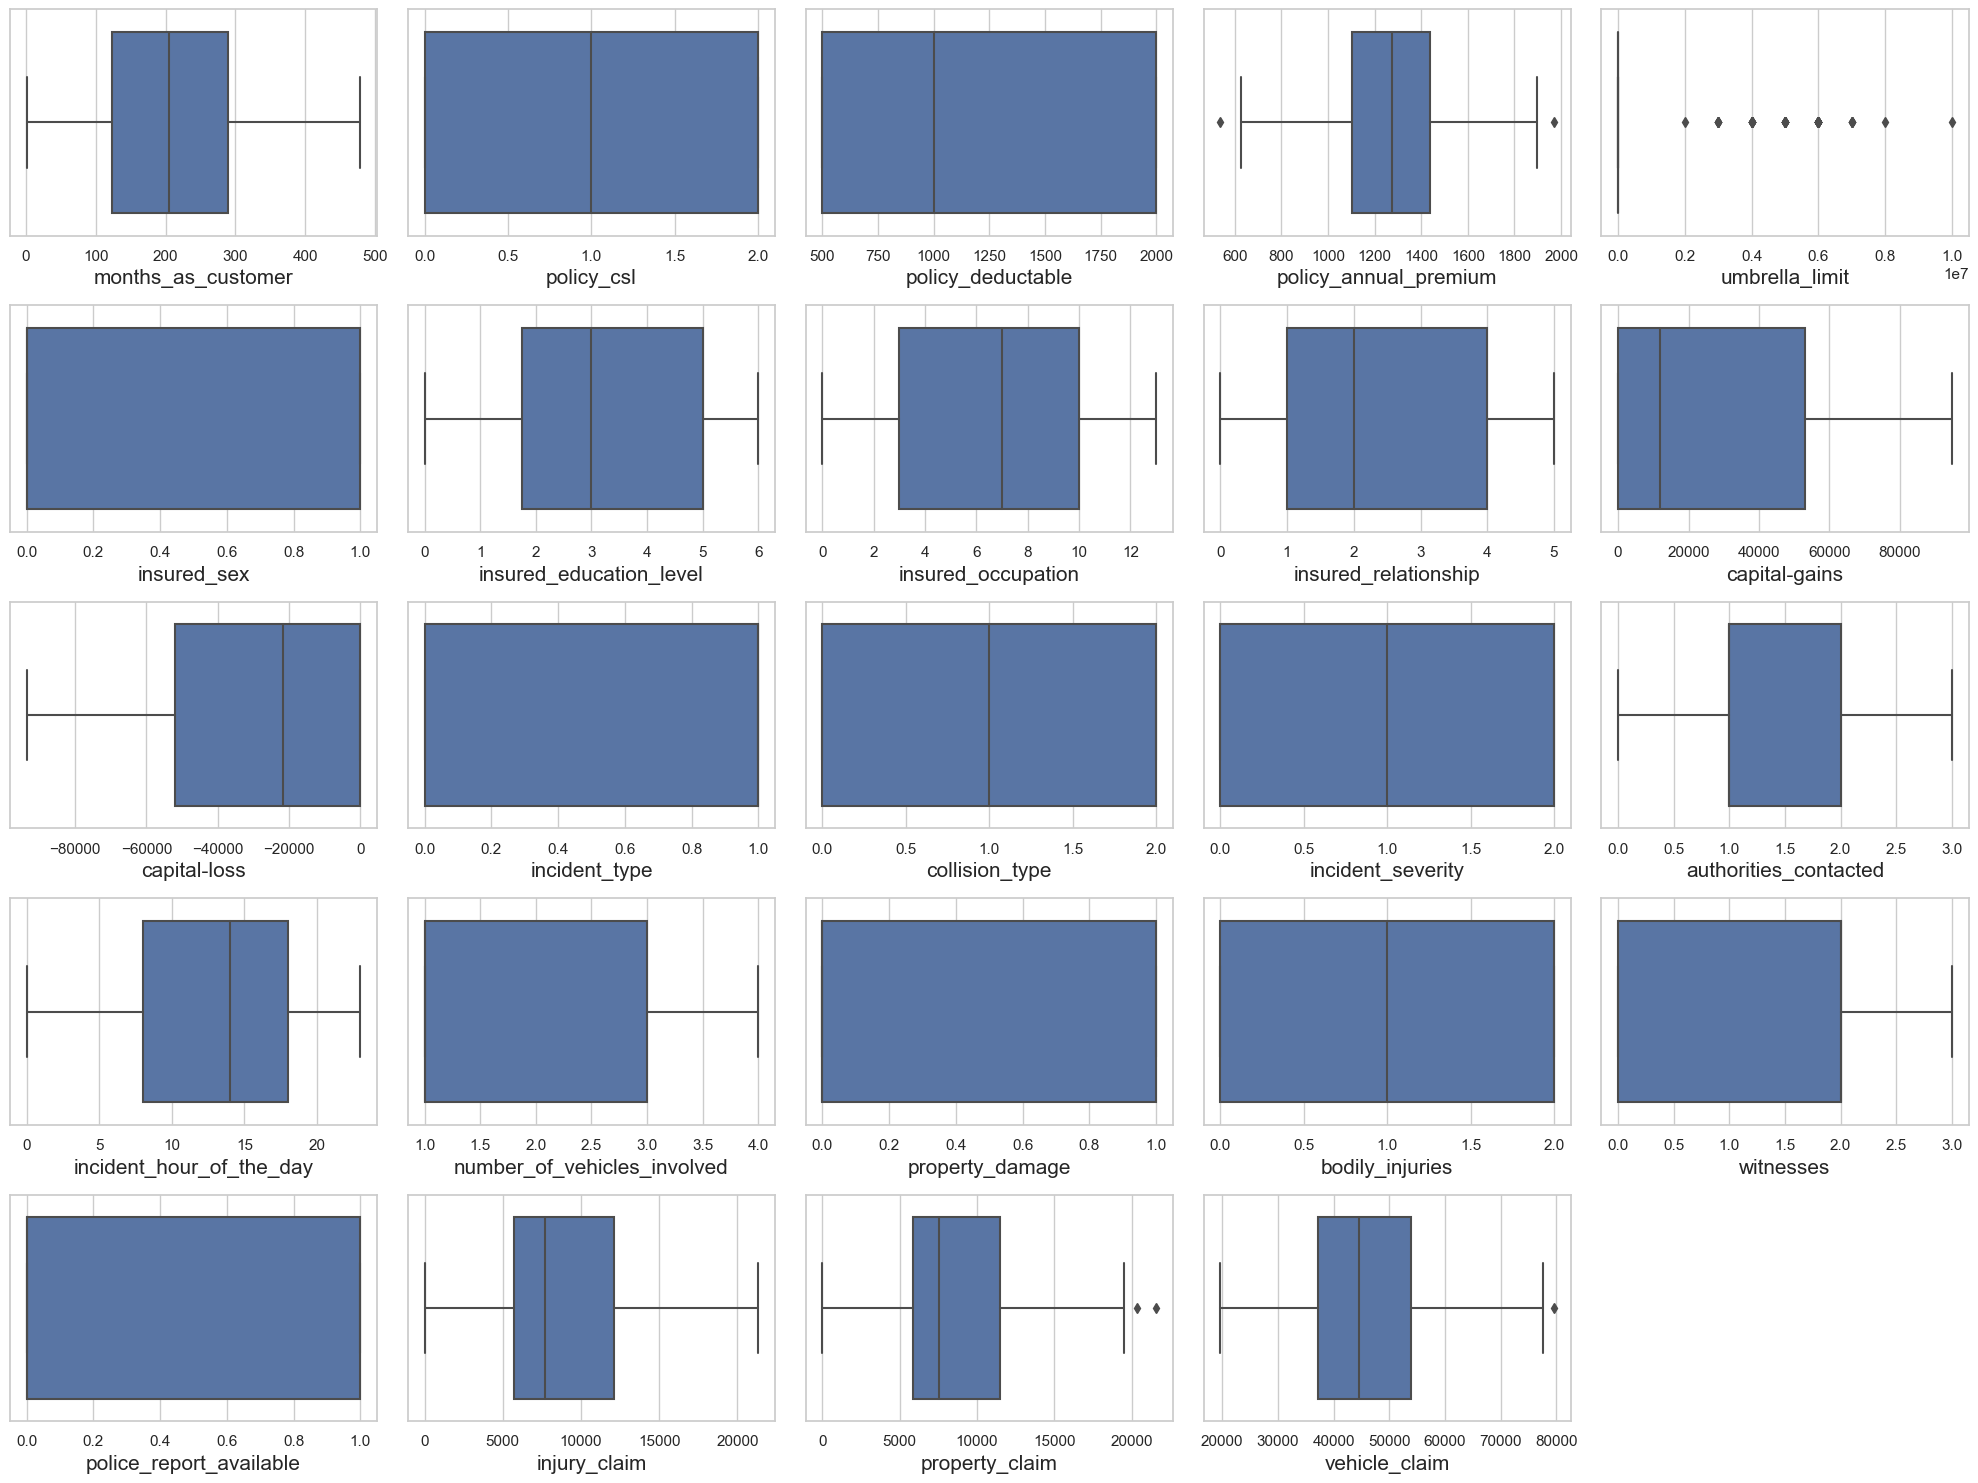

In [66]:
plt.figure(figsize=(20,15))
plotnumber=1

for col in x.columns:
    if plotnumber<=24:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=15)
        
    plotnumber+=1
plt.tight_layout()
plt.show()

- REMOVING THE OUTLIERS USING STANDARD SCALER

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [70]:
x_train.head()

ColName,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim
384,254,1.0,2000,1241.04,0,0.0,5.0,10.0,3.0,0,...,3.0,16,1,0.0,2,2,1.0,18220,18220,63770
757,173,1.0,1000,1274.63,0,1.0,1.0,6.0,4.0,51000,...,1.0,22,1,1.0,2,3,0.0,9460,9460,33110
94,271,0.0,500,1515.30,0,0.0,2.0,6.0,1.0,0,...,0.0,21,3,0.0,1,0,0.0,17040,8520,68160
163,112,2.0,1000,1166.54,0,0.0,5.0,9.0,1.0,47700,...,1.0,3,1,1.0,2,0,0.0,10790,21580,75530
778,161,0.0,2000,1133.85,0,1.0,6.0,8.0,1.0,60200,...,3.0,0,3,1.0,2,2,1.0,5040,15120,40320


In [73]:
numerical_data=x_train[['months_as_customer','policy_deductable','umbrella_limit',
                       'capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved',
                       'bodily_injuries','witnesses','injury_claim','property_claim','vehicle_claim']]

- STANDARIZATION

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(numerical_data)

In [75]:
scaled_num_df=pd.DataFrame(data=scaled_data,columns=numerical_data.columns,index=x_train.index)
scaled_num_df.head()

ColName,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
384,0.315737,1.391741,-0.456466,-0.950004,0.984093,0.434887,-0.966352,1.214038,0.502880,2.235948,2.426643,1.681941
757,-0.375690,-0.243715,-0.456466,0.872856,0.984093,1.334046,-0.966352,1.214038,1.432115,0.121985,0.190048,-1.056171
94,0.460851,-1.061443,-0.456466,-0.950004,0.984093,1.184186,0.900465,-0.014453,-1.355589,1.951190,-0.049952,2.073993
163,-0.896394,-0.243715,-0.456466,0.754907,-1.112438,-1.513290,-0.966352,1.214038,-1.355589,0.442940,3.284515,2.732176
778,-0.478124,1.391741,-0.456466,1.201686,0.984093,-1.962870,0.900465,1.214038,0.502880,-0.944649,1.635154,-0.412277


In [76]:
x_train.drop(columns=scaled_num_df.columns,inplace=True)
x_train=pd.concat([scaled_num_df,x_train],axis=1)

In [77]:
x_train.head()

ColName,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
384,0.315737,1.391741,-0.456466,-0.950004,0.984093,0.434887,-0.966352,1.214038,0.502880,2.235948,...,0.0,5.0,10.0,3.0,1.0,0.0,1.0,3.0,0.0,1.0
757,-0.375690,-0.243715,-0.456466,0.872856,0.984093,1.334046,-0.966352,1.214038,1.432115,0.121985,...,1.0,1.0,6.0,4.0,1.0,1.0,2.0,1.0,1.0,0.0
94,0.460851,-1.061443,-0.456466,-0.950004,0.984093,1.184186,0.900465,-0.014453,-1.355589,1.951190,...,0.0,2.0,6.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0
163,-0.896394,-0.243715,-0.456466,0.754907,-1.112438,-1.513290,-0.966352,1.214038,-1.355589,0.442940,...,0.0,5.0,9.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
778,-0.478124,1.391741,-0.456466,1.201686,0.984093,-1.962870,0.900465,1.214038,0.502880,-0.944649,...,1.0,6.0,8.0,1.0,0.0,0.0,2.0,3.0,1.0,1.0


In [79]:
x.skew().sort_values(ascending=False)

ColName
umbrella_limit                 1.983618
property_claim                 0.552862
injury_claim                   0.425622
policy_deductable              0.418490
capital-gains                  0.372552
months_as_customer             0.338101
number_of_vehicles_involved    0.240410
police_report_available        0.189913
vehicle_claim                  0.183180
policy_csl                     0.144780
insured_relationship           0.135165
property_damage                0.094640
insured_sex                    0.070946
authorities_contacted          0.052442
policy_annual_premium          0.016898
witnesses                     -0.002874
bodily_injuries               -0.032369
incident_type                 -0.047281
insured_education_level       -0.069920
collision_type                -0.079951
incident_severity             -0.091089
insured_occupation            -0.091108
capital-loss                  -0.325099
incident_hour_of_the_day      -0.382305
dtype: float64

# MODELING

- SVC

In [85]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_model_train_acc=accuracy_score(y_train,svc_model.predict(x_train))
svc_model_test_acc=accuracy_score(y_test,y_pred)

print("Training Accuracy:",svc_model_train_acc)
print("Test Accuracy:",svc_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training Accuracy: 0.7490196078431373
Test Accuracy: 0.7294117647058823
[[62  0]
 [23  0]]
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84        62
         1.0       0.00      0.00      0.00        23

    accuracy                           0.73        85
   macro avg       0.36      0.50      0.42        85
weighted avg       0.53      0.73      0.62        85



- K NEAREST NEIGHBORHOOD

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=30)
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn_model_train_acc=accuracy_score(y_train,knn_model.predict(x_train))
knn_model_test_acc=accuracy_score(y_test,y_pred)

print("Training Accuracy:",knn_model_train_acc)
print("Test Accuracy:",knn_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training Accuracy: 0.7490196078431373
Test Accuracy: 0.7294117647058823
[[62  0]
 [23  0]]
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84        62
         1.0       0.00      0.00      0.00        23

    accuracy                           0.73        85
   macro avg       0.36      0.50      0.42        85
weighted avg       0.53      0.73      0.62        85



- DECISION TREE CLASSIFIER

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt_model_train_acc=accuracy_score(y_train,dt_model.predict(x_train))
dt_model_test_acc=accuracy_score(y_test,y_pred)

print("Training Accuracy:",dt_model_train_acc)
print("Test Accuracy:",dt_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training Accuracy: 1.0
Test Accuracy: 0.7294117647058823
[[62  0]
 [23  0]]
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84        62
         1.0       0.00      0.00      0.00        23

    accuracy                           0.73        85
   macro avg       0.36      0.50      0.42        85
weighted avg       0.53      0.73      0.62        85



# HYPER PARAMETER TUNNING

In [103]:
from sklearn.model_selection import GridSearchCV
grid_params={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10],
    'min_samples_split':range(2,10,1),
    'min_samples_leaf':range(2,10,1)
}
grid_search=GridSearchCV(dt_model,grid_params,cv=5,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [104]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.8352941176470589


In [105]:
dt_model=grid_search.best_estimator_
y_pred=dt_model.predict(x_test)

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt_model_train_acc=accuracy_score(y_train,dt_model.predict(x_train))
dt_model_test_acc=accuracy_score(y_test,y_pred)

print("Training Accuracy:",dt_model_train_acc)
print("Test Accuracy:",dt_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training Accuracy: 0.8666666666666667
Test Accuracy: 0.6705882352941176
[[47 15]
 [13 10]]
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77        62
         1.0       0.40      0.43      0.42        23

    accuracy                           0.67        85
   macro avg       0.59      0.60      0.59        85
weighted avg       0.68      0.67      0.67        85



- RANDOM FOREST CLASSIFIER 

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(criterion='entropy',max_depth=15,max_features='sqrt',min_samples_leaf=1,min_samples_split=3,n_estimators=14)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [112]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_model_train_acc=accuracy_score(y_train,rf_model.predict(x_train))
rf_model_test_acc=accuracy_score(y_test,y_pred)

print("Training Accuracy:",rf_model_train_acc)
print("Test Accuracy:",rf_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training Accuracy: 0.9803921568627451
Test Accuracy: 0.6235294117647059
[[47 15]
 [17  6]]
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75        62
         1.0       0.29      0.26      0.27        23

    accuracy                           0.62        85
   macro avg       0.51      0.51      0.51        85
weighted avg       0.61      0.62      0.62        85



- ADA BOOST 

In [120]:
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier(base_estimator=dt_model)

parameters={
    'n_estimators':[50,70,90,120,180,200],
    'learning_rate':[0.001,0.01,0.1,1,10],
    'algorithm':['SAMME','SAMME.R']
    
}
grid_search=GridSearchCV(ada_model,parameters,n_jobs=-1,cv=5,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=8)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [121]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.001, 'n_estimators': 50}
0.8235294117647058


In [122]:
ada_model=grid_search.best_estimator_
y_pred=ada_model.predict(x_test)

In [125]:
ada_train_acc=accuracy_score(y_train,ada_model.predict(x_train))
ada_test_acc=accuracy_score(y_test,y_pred)
print(f"Training accuracy of ADA boost is: {ada_train_acc}")
print(f"Test accuracy of ADA boost is: {ada_test_acc}")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of ADA boost is: 0.8666666666666667
Test accuracy of ADA boost is: 0.6705882352941176
[[47 15]
 [13 10]]
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77        62
         1.0       0.40      0.43      0.42        23

    accuracy                           0.67        85
   macro avg       0.59      0.60      0.59        85
weighted avg       0.68      0.67      0.67        85



# MODEL COMPARISON

In [134]:
models=pd.DataFrame({
    'Model':['SVC','knn_model','Decision Tree','Random Forest','Ada Boost']
    'Score':[svc_model_test_acc,knn_model_test_acc,dt_model_test_acc,rf_model_test_acc,ada_test_acc]
})
models.sort_values(by='Score',ascending=False)

SyntaxError: invalid syntax (2969322924.py, line 3)

# SAVING THE MODEL

In [136]:
rf=RandomForestClassifier
import pickle
filename='Automobile_insurance_fraud.pkl'
pickle.dump(rf,open(filename,'wb'))